**Dominant Color 찾기**

In [25]:
pip install opencv-python

In [26]:
from google.colab.patches import cv2_imshow

In [27]:
import cv2, numpy as np
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0

    dominant = 0

    for (percent, color) in colors:
        #print(color, "{:0.2f}%".format(percent * 100))
        if dominant < percent*100 :
          color2 = color.astype(np.int64)
          if np.array_equal(color2, [0,0,0]) == False :
            dom_color = color
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return dom_color, rect

[37.21175399 44.83813212 52.83339408]


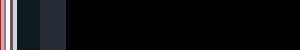

-1

In [28]:
# Load image and convert to a list of pixels
# 배경 삭제한 사진 넣기!!***
image = cv2.imread('/content/drive/MyDrive/clor/3.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find most dominant colors
cluster = KMeans(n_clusters=10).fit(reshape)
dominant, visualize = visualize_colors(cluster, cluster.cluster_centers_)
print(dominant)

# Display most dominant colors - 생략 가능
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
cv2_imshow(visualize)
cv2.waitKey()

작성한 color_table.csv 파일로 numpy data 생성
csv 배열로 저장

In [29]:
import numpy as np
import csv

data=[]

file = open('/content/drive/MyDrive/clor/color_table.csv', 'r', encoding='utf-8')    # file : 파일객체

reader = csv.reader(file)  # csv.reader(): for loop을 돌면서 line by line read

for line in reader :
    data.append(line[1: ])  #color_name 부분은 제외하고 나머지 부분만 append

file.close()

#print(data)

xy =np.array(data[1:])   # 맨 첫줄 column name 제외하고 data만 xy 매트릭스에 저장

#print(xy)

어울리는 pair 입력하기

In [30]:
#contrasting pair
c_pair = {0 : [6, 7, 10, 11, 12], 1 : [6, 7, 10, 11, 12], 2 : [5, 6, 7, 11, 12], \
          3 : [7, 8, 9, 11, 12], 4 : [5, 7, 11, 12], 5 : [2, 8, 11, 12], 6 : [0, 1, 2, 11, 12], \
          7 : [0, 1, 4, 10, 11, 12], 8 : [2, 5, 10, 11, 12], 9 : [3, 11, 12], 10 : [0, 1, 7, 8], \
          11 : [14, 15, 16, 18, 21, 22], 12 : [13, 14, 15, 16, 18], 13 : [15, 18, 19, 12, 21], 14 : [11, 19], 15 : [11, 19, 20, 21, 12], \
          16 : [11, 18, 21, 12], 17 : [11, 13, 12], 18 : [11, 13, 15, 17, 12], 19 : [11, 13, 14, 12], 20 : [15, 18], 21 : [13, 15, 16], \
          22 : [11, 28, 29, 12], 23 : [11, 12, 20, 21], 24 : [11, 22, 46, 21, 12], 25 : [11, 22, 29, 12], \
          26 : [11, 23, 28, 20, 12], 27 : [11, 12, 21], 28 : [11, 22, 26, 12], 29 : [11, 22, 23, 24, 12], \
          30 : [11, 36, 37, 46], 31 : [11, 34, 35, 36, 12], 32 : [11, 34, 36, 47, 12], 33 : [11, 36, 47, 12], \
          34 : [35, 11, 12], 35 : [11, 31, 32], 36 : [11, 32, 30, 16, 17], 37 : [11, 34, 32, 31, 33], \
          38 : [11, 35, 36, 12], 39 : [11, 36, 37], 40 : [11, 35, 36, 46], 41 : [11, 36, 46, 12], 42 : [11, 36, 46, 12], \
          43 : [11, 36, 37], 44 : [11, 35, 36, 46], 45 : [11, 36, 46, 12], 46 : [14, 15, 30, 45], 47 : [30, 32, 33], 
          48 : [35, 11, 12], 49 : [35, 11, 12]}

#tonal pair
t_pair = {0 : [1, 3], 1 : [0, 3], 2 : [3, 9], 3 : [4, 2], 4 : [3], \
          5 : [4, 6], 6 : [7, 8], 7 : [6, 8], 8 : [6, 7], 9 : [2], 10 : [11, 12], \
          11 : [13, 20], 12 : [20, 21], 13 : [11], 14 : [15, 17], 15 : [13, 16, 17], 16 : [13, 14], \
          17 : [14, 15, 16], 18 : [19], 19 : [18], 20 : [11, 21, 12], 21 : [11, 20, 12], \
          22 : [23], 23 : [22, 28, 29], 24 : [25, 26], 25 : [24, 26], 26 : [24, 25], \
          27 : [22, 23, 28, 29], 28 : [27, 29], 29 : [27, 28], \
          30 : [24, 25], 31 : [32, 33], 32 : [31, 33], 33 : [31, 27, 29], 34 : [50, 51], 35 : [36, 21, 47], \
          36 : [47, 37], 37 : [47, 12], 38 : [42, 44], 39 : [40, 42, 45], 40 : [39, 43, 45], \
          41 : [39, 44], 42 : [39, 44, 43], 43 : [42, 44, 45], 44 : [39, 40], 45 : [39, 44, 43], 46 : [21, 20], 47 : [35, 36, 37], \
          48 : [34, 49], 49 : [34, 48]}

RGB 값을 Lab으로 변환해서 similar color 찾아 similar color과 어울리는 색상 pair의 값 출력

In [31]:
pip install colormath 

In [34]:
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

#입력받은 input - 연결 필요
input = sRGBColor(dominant[0], dominant[1], dominant[2], is_upscaled=True) 
input_lab = convert_color(input, LabColor, through_rgb_type=sRGBColor)


In [42]:
similar = 100000000
index = 0

#색상 테이블 수에 따라서 range안의 값 바꾸기 - 출력해서 수 확인+1
for i in range(48) : 
  color_n = xy[i][0]

  #sRGB 클래스 인스턴스 생성. RGB 값을 넣을 때 is_upscaled=True로 해줘야 함
  rgb = sRGBColor(float(xy[i][1]),float(xy[i][2]), float(xy[i][3]), is_upscaled=True)

  #Lab으로 변환
  lab = convert_color(rgb, LabColor, through_rgb_type=sRGBColor)
  #print(lab)

  delta_e = delta_e_cie2000(input_lab, lab)
  #print(i, '번: ',delta_e)

  if(similar > delta_e) :
    similar = delta_e
    index = i

best_pair_c = c_pair[index]
best_pair_t = t_pair[index]

if (similar > 15) :
  print('유사 주의')

print('유사 기준 : ', similar)
print('가장 유사한 색상 인덱스 : ', index)
print('complement 조합 : ',best_pair_c) #complementary 배색 
for i in best_pair_c :
  r = float(xy[i][1])
  g = float(xy[i][2])
  b = float(xy[i][3])
  print(i, '번 색상', '( ', r, g,  b, ')')

print('tonal 조합 : ', best_pair_t) #tonal 배색
for i in best_pair_t :
  r = float(xy[i][1])
  g = float(xy[i][2])
  b = float(xy[i][3])
  print(i, '번 색상', '( ', r, g,  b, ')')

유사 기준 :  8.778937780386428
가장 유사한 색상 인덱스 :  37
complement 조합 :  [11, 34, 32, 31, 33]
11 번 색상 (  255.0 255.0 255.0 )
34 번 색상 (  233.0 231.0 242.0 )
32 번 색상 (  240.0 216.0 204.0 )
31 번 색상 (  226.0 178.0 158.0 )
33 번 색상 (  202.0 154.0 144.0 )
tonal 조합 :  [47, 12]
47 번 색상 (  61.0 61.0 35.0 )
12 번 색상 (  0.0 0.0 0.0 )
